In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import syllables
import re
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../Data/train.csv')

In [4]:
excerpts = df['excerpt']

In [5]:
i = 0
excerptData = {}
for entry in excerpts:
    count = 0
    excerptData[i] = [len(entry.split()), len(re.split(r'\.!?', entry))]
    for word in entry.split():
        word = word.strip(',.')
        count += syllables.estimate(word)
    excerptData[i].append(count)
    i += 1

In [6]:
def fleschKincaid(words, sentences, syllableCount):
    return (206.835 - 1.015*(words/sentences) - 84.6*(syllableCount/words))

In [7]:
for i in range(len(excerptData)):
    excerptData[i].append(fleschKincaid(*excerptData[i]))

In [8]:
excerptData = np.array(list(excerptData.values()))

In [9]:
fleschValues = excerptData[:, 3]

In [10]:
targetValues = np.array(df['target'])

In [11]:
reg = LinearRegression().fit(fleschValues.reshape(-1,1), targetValues)

In [12]:
reg.coef_

array([0.03250879])

Text(0, 0.5, 'Target Values')

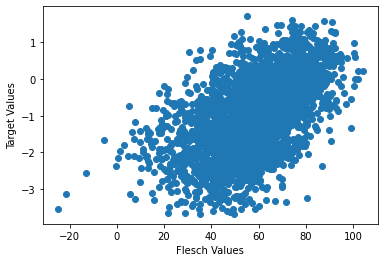

In [13]:
plt.scatter(fleschValues, targetValues)
plt.xlabel("Flesch Values")
plt.ylabel("Target Values")